In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# **S8_L45**

The 365 team has developed a diet and an exercise program for losing weight. It seems that it works like a charm. However, you are interested in how much weight are you likely to lose.

You have a sample of 10 people who have already completed the 12-week program. The second sheet in shows the data in kg, if you feel more comfortable using kg as a unit of measurement	

1. Calculate the mean and standard deviation of the dataset												
2. Determine the appropriate statistic to use												
3. Calculate the 95% confidence interval												
4. Interpret the result												

You can try to calculate the 90% and 99% confidence intervals to see the difference. There is no solution provided for these cases. 												

In [2]:
subjects = pd.read_excel("S8_L45\\subjects.xlsx", index_col = "Subject")
subjects

,Weight before (lbs),Weight after (lbs),Difference
Subject,,,
1,228.575273,204.743303,-23.831971
2,244.007632,223.945566,-20.062066
3,262.460323,232.940426,-29.519897
4,224.320352,212.040604,-12.279748
5,202.141848,191.736029,-10.405819
6,246.983872,233.469535,-13.514337
7,195.858674,177.604398,-18.254275
8,231.882207,213.848394,-18.033813
9,243.324199,218.852887,-24.471311


# 1

In [3]:
subjects["Difference"].mean()

-20.024587257460006

In [4]:
mean = subjects["Difference"].mean()

In [5]:
subjects["Difference"].std()

6.858892810864106

In [6]:
std = subjects["Difference"].std()

In [7]:
standard_error = std / np.sqrt(len(subjects["Difference"]))

# 2

T statistics: 
1. Population variance is unknown		
2. We have a small sample		
3. We assume that the population is normally distributed			

# 3. 95% confidence interval 

In [8]:
interval = [mean + 2.26 * standard_error, mean - 2.26 * standard_error]

In [9]:
interval

[-15.122709744361583, -24.92646477055843]

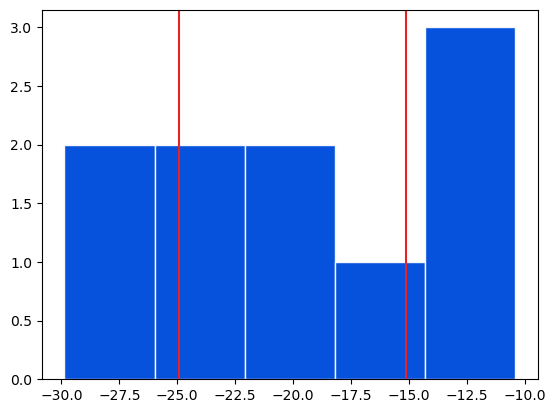

In [10]:
plt.hist(subjects["Difference"], color = "#0652DD", edgecolor = "#f5f6fa", bins = 5)
plt.axvline(interval[0], color = "#EA2027")
plt.axvline(interval[1], color = "#EA2027")
plt.show()

# 4

You are 95% confident that you will lose between 24.93lbs and 15.12lbs,	
given that you follow the program as strict as the sample.

In [11]:
interval2 = [mean + 1.83 * standard_error, mean - 1.83 * standard_error] # 90% confidence interval

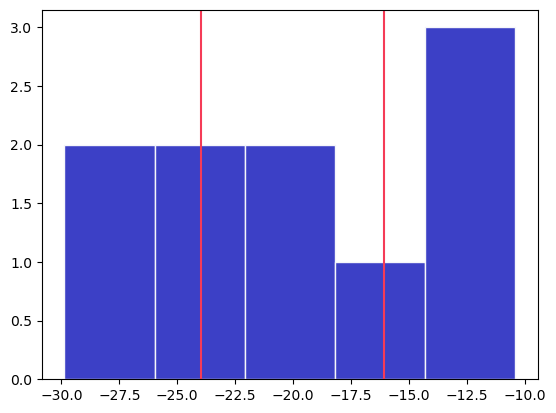

In [12]:
plt.hist(subjects["Difference"], color = "#3c40c6", edgecolor = "#f5f6fa", bins = 5)
plt.axvline(interval2[0], color = "#f53b57")
plt.axvline(interval2[1], color = "#f53b57")
plt.show()

In [13]:
interval3 = [mean + 3.25 * standard_error, mean - 3.25 * standard_error] # 99% confidence interval

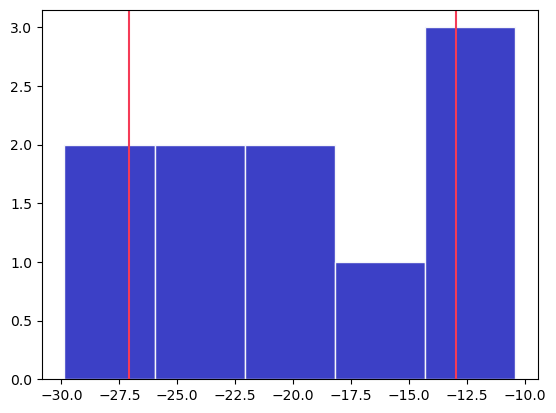

In [14]:
plt.hist(subjects["Difference"], color = "#3c40c6", edgecolor = "#f5f6fa", bins = 5)
plt.axvline(interval3[0], color = "#f53b57")
plt.axvline(interval3[1], color = "#f53b57")
plt.show()

# S8_L47

You have the dataset from the lesson.				

1. Calculate the 99% confidence interval				
2. Compare it to the 95% confidence interval from the lesson				

In [15]:
grades = pd.read_excel("S8_L47\\grades.xlsx")
grades = grades.rename(columns = {"Unnamed: 0" : "Parameters"})
grades.index.name = "Index"

In [16]:
grades

,Parameters,Engineering,Management,Difference
Index,,,,
0,Size,100,70,NaN
1,Sample mean,58,65,-7.000000
2,Population std,10,5,1.164965


**99% confidence interval**

In [17]:
mean_difference = grades.loc[1, "Engineering"] - grades.loc[1, "Management"]
mean_difference

-7

In [18]:
std_difference = (grades.loc[2, "Engineering"] ** 2 / grades.loc[0, "Engineering"]
                  + 
                  grades.loc[2, "Management"] ** 2 / grades.loc[0, "Management"])

std_difference = round(std_difference, 2)
std_difference

1.36

In [19]:
interval_grades = [round(mean_difference - 2.58 * np.sqrt(std_difference), 2), 
                   round(mean_difference + 2.58 * np.sqrt(std_difference), 2)]

In [20]:
interval_grades

[-10.01, -3.99]

**95% interval**

In [21]:
interval_grades_95 = [round(mean_difference - 1.96 * np.sqrt(std_difference), 2), 
                   round(mean_difference + 1.96 * np.sqrt(std_difference), 2)]

In [22]:
interval_grades_95

[-9.29, -4.71]

# S8_L49

You have the same datasets from the lesson.						

1. Calculate the 90% confidence interval						
2. Compare the result with the 95% confidence interval from the lesson					

In [23]:
apples = pd.read_excel("S8_L49\\apples.xlsx")
apples

,NY apples,LA apples
0,3.80,3.02
1,3.76,3.22
2,3.87,3.24
3,3.99,3.02
4,4.02,3.06
5,4.25,3.15
6,4.13,3.81
7,3.98,3.44
8,3.99,NaN
9,3.62,NaN


In [24]:
std_x = apples["NY apples"].std()
std_x = round(std_x, 2)
std_x

0.18

In [25]:
std_y = apples["LA apples"].std()
std_y = round(std_y, 2)
std_y

0.27

In [26]:
n_x = len(apples["NY apples"])
n_x

10

In [27]:
n_y = len(apples["LA apples"]) - apples["LA apples"].isnull().sum()
n_y

8

In [28]:
mean_x = apples["NY apples"].mean()
mean_x = round(mean_x, 2)
mean_x

3.94

In [29]:
mean_y = apples["LA apples"].mean()
mean_y = round(mean_y, 2)
mean_y

3.24

Applying the pooled variance formula 

In [30]:
pooled = ((n_x - 1) * std_x ** 2 + (n_y - 1) * std_y ** 2) / (n_x + n_y - 2)

pooled = round(pooled, 2)
pooled

0.05

In [31]:
std_pooled = round(np.sqrt(pooled), 2)
std_pooled

0.22

In [48]:
confidence_interval = [round((mean_x - mean_y) - 1.75 * np.sqrt(pooled / n_x + pooled / n_y), 2), 
                       round((mean_x - mean_y) + 1.75 * np.sqrt(pooled / n_y + pooled / n_y), 3)]

In [51]:
confidence_interval # this is the 90% confidence interval 

[0.51, 0.896]

In [52]:
confidence_interval2 = [round((mean_x - mean_y) - 2.12 * np.sqrt(pooled / n_x + pooled / n_y), 2), 
                       round((mean_x - mean_y) + 2.12 * np.sqrt(pooled / n_y + pooled / n_y), 3)]

In [54]:
confidence_interval2 # this is the 95% confidence interval

[0.48, 0.937]

A lower confidence results in a narrower interval (see Margin of error lesson)